In [43]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [44]:
raw_dir="data/raw/Transactions Data"
interim_dir = "data/interim/prob_turism.csv"

In [45]:
# Raw data to get allocations

frames = []

for filename in os.listdir(raw_dir):
    f = os.path.join(raw_dir, filename)
    print(f)
    # checking if it is a file
    if "detalhado" in f and ".xlsx" in f:
        df = pd.read_excel(f)
        frames.append(df)

raw_data = pd.concat(frames)


data/raw/Transactions Data/SIBS_Analytics_Freguesias_Agregado_2020_01_2021_11.xlsx
data/raw/Transactions Data/SIBS_Analytics_Freguesias_detalhado_20220613.xlsx
data/raw/Transactions Data/SIBS_Analytics_Freguesias_detalhado_20220310.xlsx
data/raw/Transactions Data/SIBS_Analytics_Freguesias_detalhado_202110_20220222.xlsx
data/raw/Transactions Data/SIBS_Analytics_Freguesias_detalhado_20220718.xlsx
data/raw/Transactions Data/SIBS_Analytics_Freguesias_detalhado_20220412.xlsx
data/raw/Transactions Data/SIBS_Analytics_Freguesias_detalhado_20220511.xlsx
data/raw/Transactions Data/SIBS_Analytics_Freguesias_detalhado_20220818.xlsx


In [55]:
hotel_data = raw_data[(raw_data["Setor"]=="Hoteis e Resorts") | (raw_data["Setor"]=="Alojamento") | (raw_data["Setor"]=="Alojamento Local")].copy()

In [56]:
month_dict = {
    "Jan": 1,
    "Fev": 2,
    "Mar": 3,
    "Abr":4,
    "Mai": 5,
    "Jun": 6,
    "Jul": 7,
    "Ago": 8,
    "Set": 9,
    "Out": 10,
    "Nov": 11,
    "Dez": 12,
}

hotel_data["Mês"] = [month_dict[i[:3]] for i in hotel_data["Ano/Mês"]]
hotel_data["Ano"] = [i[-2:] for i in hotel_data["Ano/Mês"]]
hotel_data = hotel_data.sort_values(by=["Ano", "Mês"])

In [57]:
hotel_data

,Ano/Mês,Tipo de dia,País do cartão,Setor,Freguesia,Nº de operações,Valor das operações,Mês,Ano
28,Nov 21,Dia da Semana,Argentina,Alojamento Local,"União das freguesias de Cedofeita, Santo Ildef...",15,1169.58,11,21
29,Nov 21,Dia da Semana,Argentina,Hoteis e Resorts,"União das freguesias de Cedofeita, Santo Ildef...",20,1213.93,11,21
40,Nov 21,Dia da Semana,Australia,Hoteis e Resorts,"União das freguesias de Cedofeita, Santo Ildef...",20,2209.74,11,21
66,Nov 21,Dia da Semana,Austria,Alojamento,"União das freguesias de Cedofeita, Santo Ildef...",23,1549.79,11,21
67,Nov 21,Dia da Semana,Austria,Alojamento Local,ARU/ORU do Centro Histórico,13,1581.65,11,21
...,...,...,...,...,...,...,...,...,...
19069,Jul 22,Fim de Semana,Estados Unidos Da America,Hoteis e Resorts,ARU/ORU do Centro Histórico,906,153456.06,7,22
19070,Jul 22,Fim de Semana,Estados Unidos Da America,Hoteis e Resorts,Bonfim,100,10977.69,7,22
19071,Jul 22,Fim de Semana,Estados Unidos Da America,Hoteis e Resorts,"União das freguesias de Cedofeita, Santo Ildef...",2034,335563.32,7,22
19072,Jul 22,Fim de Semana,Estados Unidos Da America,Hoteis e Resorts,União das freguesias de Lordelo do Ouro e Mass...,325,32800.71,7,22


In [152]:
# Interim data with prob metric
prob_df = pd.read_csv(interim_dir)

In [50]:
hotel_data['Mês']

28       11
29       11
40       11
66       11
67       11
         ..
19069     7
19070     7
19071     7
19072     7
19141     7
Name: Mês, Length: 8909, dtype: int64

In [51]:
def replace_origin_local(row):
    if row['País do cartão'] == 'Portugal':
        return 'local'
    else:
        return 'non-local'

In [58]:
hotel_data['origin'] = hotel_data.apply(lambda row: replace_origin_local(row), axis=1)

In [59]:
hotel_data

,Ano/Mês,Tipo de dia,País do cartão,Setor,Freguesia,Nº de operações,Valor das operações,Mês,Ano,origin
28,Nov 21,Dia da Semana,Argentina,Alojamento Local,"União das freguesias de Cedofeita, Santo Ildef...",15,1169.58,11,21,non-local
29,Nov 21,Dia da Semana,Argentina,Hoteis e Resorts,"União das freguesias de Cedofeita, Santo Ildef...",20,1213.93,11,21,non-local
40,Nov 21,Dia da Semana,Australia,Hoteis e Resorts,"União das freguesias de Cedofeita, Santo Ildef...",20,2209.74,11,21,non-local
66,Nov 21,Dia da Semana,Austria,Alojamento,"União das freguesias de Cedofeita, Santo Ildef...",23,1549.79,11,21,non-local
67,Nov 21,Dia da Semana,Austria,Alojamento Local,ARU/ORU do Centro Histórico,13,1581.65,11,21,non-local
...,...,...,...,...,...,...,...,...,...,...
19069,Jul 22,Fim de Semana,Estados Unidos Da America,Hoteis e Resorts,ARU/ORU do Centro Histórico,906,153456.06,7,22,non-local
19070,Jul 22,Fim de Semana,Estados Unidos Da America,Hoteis e Resorts,Bonfim,100,10977.69,7,22,non-local
19071,Jul 22,Fim de Semana,Estados Unidos Da America,Hoteis e Resorts,"União das freguesias de Cedofeita, Santo Ildef...",2034,335563.32,7,22,non-local
19072,Jul 22,Fim de Semana,Estados Unidos Da America,Hoteis e Resorts,União das freguesias de Lordelo do Ouro e Mass...,325,32800.71,7,22,non-local


In [97]:
grouped_hotel_df = hotel_data.groupby(['origin', 'Freguesia', 'Ano/Mês', 'Ano', 'Mês'], as_index=False).sum()

In [153]:
prob_df

,Unnamed: 0,index,origin,Setor,Freguesia,Ano/Mês,Nº de operações,Valor das operações,prob,Mês,Ano
0,177,2194,non-local,"Bares, Cafés e Similares",ARU/ORU da Corujeira,Nov 21,723,17019.33,0.143339,11,21
1,186,2203,non-local,"Bares, Cafés e Similares",ARU/ORU de Campanhã - Estação,Nov 21,113,792.18,0.017468,11,21
2,195,2212,non-local,"Bares, Cafés e Similares",ARU/ORU do Centro Histórico,Nov 21,20093,354681.57,0.449448,11,21
3,204,2221,non-local,"Bares, Cafés e Similares",Bonfim,Nov 21,1904,67522.98,0.064746,11,21
4,213,2230,non-local,"Bares, Cafés e Similares",Campanhã,Nov 21,101,956.21,0.009383,11,21
...,...,...,...,...,...,...,...,...,...,...,...
165,299,3314,non-local,Restaurantes,Paranhos,Jul 22,4701,150988.89,0.043808,7,22
166,308,3323,non-local,Restaurantes,Ramalde,Jul 22,3151,96133.59,0.043735,7,22
167,317,3332,non-local,Restaurantes,"União das freguesias de Aldoar, Foz do Douro e...",Jul 22,10886,572480.76,0.149074,7,22
168,326,3341,non-local,Restaurantes,"União das freguesias de Cedofeita, Santo Ildef...",Jul 22,313839,10134730.00,0.456407,7,22


In [154]:
prob_rest_df = prob_df[prob_df['Setor'] == 'Restaurantes']
prob_bars_df = prob_df[prob_df['Setor'] == 'Bares, Cafés e Similares']

In [98]:
grouped_hotel_df

,origin,Freguesia,Ano/Mês,Ano,Mês,Nº de operações,Valor das operações
0,local,ARU/ORU de Campanhã - Estação,Abr 22,22,4,2838,144866.79
1,local,ARU/ORU de Campanhã - Estação,Jul 22,22,7,1073,56302.49
2,local,ARU/ORU de Campanhã - Estação,Jun 22,22,6,2132,102526.60
3,local,ARU/ORU de Campanhã - Estação,Mai 22,22,5,4539,138948.27
4,local,ARU/ORU do Centro Histórico,Abr 22,22,4,6672,425409.66
...,...,...,...,...,...,...,...
93,non-local,União das freguesias de Lordelo do Ouro e Mass...,Jul 22,22,7,14482,1375001.62
94,non-local,União das freguesias de Lordelo do Ouro e Mass...,Jun 22,22,6,25056,2468120.58
95,non-local,União das freguesias de Lordelo do Ouro e Mass...,Mai 22,22,5,27939,3020958.18
96,non-local,União das freguesias de Lordelo do Ouro e Mass...,Mar 22,22,3,15312,1448130.06


In [99]:
grouped_hotel_df['Ano'] = grouped_hotel_df['Ano'].astype(int)

In [116]:
grouped_hotel_df=grouped_hotel_df[grouped_hotel_df['origin']=='non-local']

In [155]:
big_merged_rest_df = pd.merge(grouped_hotel_df, prob_rest_df, on=['origin', 'Ano/Mês', 'Freguesia', 'Ano', 'Mês'], how="inner")

In [156]:
big_merged_bars_df = pd.merge(grouped_hotel_df, prob_bars_df, on=['origin', 'Ano/Mês', 'Freguesia', 'Ano', 'Mês'], how="inner")

In [157]:
result_rest_df=big_merged_rest_df[['Freguesia', 'Ano/Mês', 'Nº de operações_x', 'prob', 'Ano', 'Mês']]

In [158]:
result_bars_df=big_merged_bars_df[['Freguesia', 'Ano/Mês', 'Nº de operações_x', 'prob', 'Ano', 'Mês']]

In [159]:
result_rest_df

,Freguesia,Ano/Mês,Nº de operações_x,prob,Ano,Mês
0,ARU/ORU de Campanhã - Estação,Abr 22,3297,0.193358,22,4
1,ARU/ORU de Campanhã - Estação,Jul 22,1936,0.272502,22,7
2,ARU/ORU de Campanhã - Estação,Jun 22,2782,0.243245,22,6
3,ARU/ORU de Campanhã - Estação,Mai 22,4392,0.209181,22,5
4,ARU/ORU do Centro Histórico,Abr 22,37362,0.523834,22,4
5,ARU/ORU do Centro Histórico,Dez 21,8242,0.314594,21,12
6,ARU/ORU do Centro Histórico,Fev 22,18324,0.409009,22,2
7,ARU/ORU do Centro Histórico,Jan 22,8121,0.292840,22,1
8,ARU/ORU do Centro Histórico,Jul 22,21572,0.582754,22,7
9,ARU/ORU do Centro Histórico,Jun 22,34884,0.565070,22,6


In [160]:
result_rest_df['Nº de operações_x'].corr(result_df['prob'])

0.5662299477706245

In [161]:
result_bars_df['Nº de operações_x'].corr(result_df['prob'])

0.46409507352500173

In [162]:
def hotel_improv(row):
    return row['prob']/row['Nº de operações_x']

In [163]:
result_rest_df['hotel_improv'] = result_rest_df.apply(lambda row: hotel_improv(row), axis=1)

/tmp/ipykernel_40426/3378381646.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_rest_df['hotel_improv'] = result_rest_df.apply(lambda row: hotel_improv(row), axis=1)


In [164]:
result_bars_df['hotel_improv'] = result_bars_df.apply(lambda row: hotel_improv(row), axis=1)

/tmp/ipykernel_40426/2264641972.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_bars_df['hotel_improv'] = result_bars_df.apply(lambda row: hotel_improv(row), axis=1)


In [165]:
result_bars_df

,Freguesia,Ano/Mês,Nº de operações_x,prob,Ano,Mês,hotel_improv
0,ARU/ORU de Campanhã - Estação,Abr 22,3297,0.049942,22,4,1.514760e-05
1,ARU/ORU de Campanhã - Estação,Jul 22,1936,0.055044,22,7,2.843186e-05
2,ARU/ORU de Campanhã - Estação,Jun 22,2782,0.058398,22,6,2.099130e-05
3,ARU/ORU de Campanhã - Estação,Mai 22,4392,0.039595,22,5,9.015289e-06
4,ARU/ORU do Centro Histórico,Abr 22,37362,0.503746,22,4,1.348284e-05
5,ARU/ORU do Centro Histórico,Dez 21,8242,0.376766,21,12,4.571288e-05
6,ARU/ORU do Centro Histórico,Fev 22,18324,0.423873,22,2,2.313215e-05
7,ARU/ORU do Centro Histórico,Jan 22,8121,0.334849,22,1,4.123250e-05
8,ARU/ORU do Centro Histórico,Jul 22,21572,0.543414,22,7,2.519070e-05
9,ARU/ORU do Centro Histórico,Jun 22,34884,0.558395,22,6,1.600721e-05


In [166]:
result_rest_df_noramalde = result_rest_df.copy()
result_bars_df_noramalde = result_bars_df.copy()

In [167]:
result_rest_df_noramalde = result_rest_df_noramalde[result_rest_df_noramalde['Freguesia'] != 'Ramalde']
result_bars_df_noramalde = result_bars_df_noramalde[result_bars_df_noramalde['Freguesia'] != 'Ramalde']

In [168]:
result_bars_df_noramalde

,Freguesia,Ano/Mês,Nº de operações_x,prob,Ano,Mês,hotel_improv
0,ARU/ORU de Campanhã - Estação,Abr 22,3297,0.049942,22,4,0.000015
1,ARU/ORU de Campanhã - Estação,Jul 22,1936,0.055044,22,7,0.000028
2,ARU/ORU de Campanhã - Estação,Jun 22,2782,0.058398,22,6,0.000021
3,ARU/ORU de Campanhã - Estação,Mai 22,4392,0.039595,22,5,0.000009
4,ARU/ORU do Centro Histórico,Abr 22,37362,0.503746,22,4,0.000013
5,ARU/ORU do Centro Histórico,Dez 21,8242,0.376766,21,12,0.000046
6,ARU/ORU do Centro Histórico,Fev 22,18324,0.423873,22,2,0.000023
7,ARU/ORU do Centro Histórico,Jan 22,8121,0.334849,22,1,0.000041
8,ARU/ORU do Centro Histórico,Jul 22,21572,0.543414,22,7,0.000025
9,ARU/ORU do Centro Histórico,Jun 22,34884,0.558395,22,6,0.000016


In [169]:
result_rest_df_noramalde = result_rest_df_noramalde.sort_values(["Ano", "Mês"])
result_bars_df_noramalde = result_bars_df_noramalde.sort_values(["Ano", "Mês"])

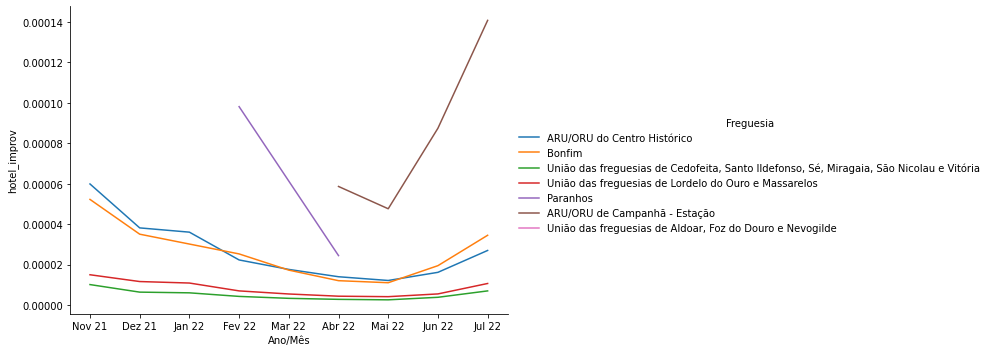

In [177]:
sns.relplot(data=result_rest_df_noramalde, x="Ano/Mês", y="hotel_improv", hue="Freguesia", aspect=1.61, kind="line")

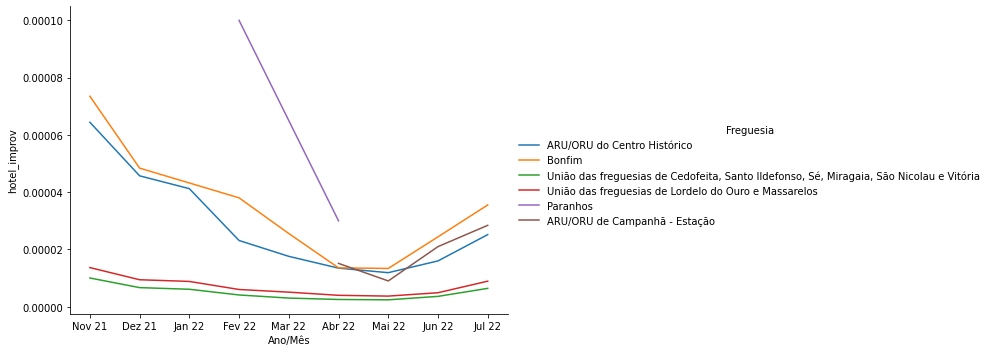

In [176]:
sns.relplot(data=result_bars_df_noramalde, x="Ano/Mês", y="hotel_improv", hue="Freguesia", aspect=1.61, kind="line")

In [175]:
result_rest_df_noramalde.groupby('Freguesia')['hotel_improv'].mean()

Freguesia
ARU/ORU de Campanhã - Estação                                                              0.000084
ARU/ORU do Centro Histórico                                                                0.000027
Bonfim                                                                                     0.000026
Paranhos                                                                                   0.000061
União das freguesias de Aldoar, Foz do Douro e Nevogilde                                   0.000044
União das freguesias de Cedofeita, Santo Ildefonso, Sé, Miragaia, São Nicolau e Vitória    0.000005
União das freguesias de Lordelo do Ouro e Massarelos                                       0.000008
Name: hotel_improv, dtype: float64

In [174]:
result_bars_df_noramalde.groupby('Freguesia')['hotel_improv'].mean()

Freguesia
ARU/ORU de Campanhã - Estação                                                              0.000018
ARU/ORU do Centro Histórico                                                                0.000029
Bonfim                                                                                     0.000034
Paranhos                                                                                   0.000065
União das freguesias de Cedofeita, Santo Ildefonso, Sé, Miragaia, São Nicolau e Vitória    0.000005
União das freguesias de Lordelo do Ouro e Massarelos                                       0.000007
Name: hotel_improv, dtype: float64